In [33]:
!pip install openai networkx matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import os
os.environ["OPENAI_API_KEY"] = "OPENAI_API_KEY"


In [35]:
import openai

def extract_triples(text, max_triples=10):
    prompt = f"Extract {max_triples} subject-predicate-object triples from the following text in the format 'Subject - Predicate - Object':\n{text}\n\nTriples:\n"

    response = openai.Completion.create(
        engine="text-davinci-002",
        prompt=prompt,
        max_tokens=100,
        n=1,
        stop=None,
        temperature=0.5,
    )

    output = response.choices[0].text.strip()
    print(f"Extracted output: {output}")  # Add this line to inspect the output
    triples = []

    for line in output.split('\n'):
        if line:
            delimiter = '-' if '-' in line else ','
            subject, predicate, obj = line.split(delimiter, 2)
            triples.append((subject.strip(), predicate.strip(), obj.strip()))

    return triples

In [36]:
import networkx as nx

def build_knowledge_graph(triples):
    G = nx.DiGraph()

    for subject, predicate, obj in triples:
        subject, predicate, obj = subject.strip(), predicate.strip(), obj.strip()
        G.add_edge(subject, obj, label=predicate)

    return G


In [37]:
import matplotlib.pyplot as plt

def visualize_knowledge_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=16)
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    plt.show()


Extracted output: Apple Inc. - is - an American multinational technology company
Apple Inc. - was founded by - Steve Jobs, Steve Wozniak, and Ronald Wayne
Apple Inc. - designs - consumer electronics, computer software, and online services
Apple Inc. - manufactures - consumer electronics, computer software, and online services
Apple Inc. - markets - consumer electronics, computer software, and online services
Apple Inc. - hardware products include - the iPhone smartphone, the iPad tablet computer, the


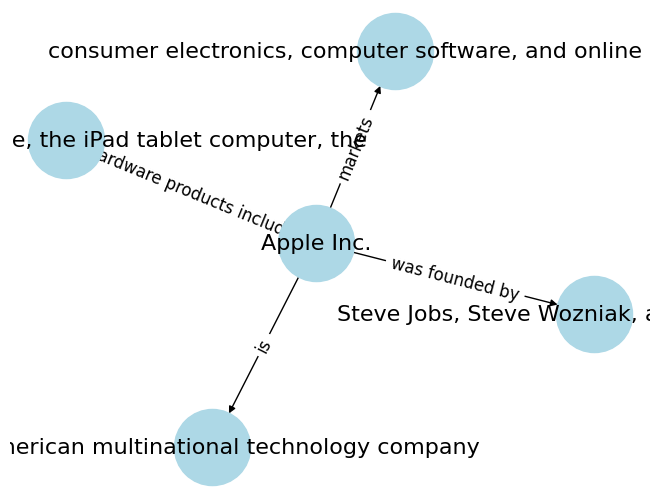

In [38]:
text = """
Apple Inc. is an American multinational technology company headquartered in Cupertino, California. It was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976. Apple designs, manufactures, and markets consumer electronics, computer software, and online services. Its hardware products include the iPhone smartphone, the iPad tablet computer, the Mac personal computer, the iPod portable media player, and the Apple Watch smartwatch. Apple's software includes the macOS and iOS operating systems, the iTunes media player, the Safari web browser, and the iWork and iLife creativity and productivity suites. Its online services include the iTunes Store, the App Store, and iCloud.
"""

triples = extract_triples(text)
G = build_knowledge_graph(triples)
visualize_knowledge_graph(G)
